In this notebook we will see how to implement PCA using the library scikit learn and how we could do a diagnostic for our PCs. Far from mathematical aspect, scikit learn gives you a ready to use tool to work with PCA.
Let's enjoy with it :D :D :D

In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import random as rd 
import matplotlib.pyplot as plt


We will generate a random data to work with. A dataset of 100 genes (as explained in the article) with names "gene1,gene2..."

In [40]:
genes=["gene"+ str(i) for i in range(1,101)]
mouse=["mouse"+ str(i) for i in range(1,6)]
monkey=["monkey"+ str(i) for i in range(1,6)]

In [41]:
data=pd.DataFrame(columns=[*mouse,*monkey],index=genes)

In [89]:
#For this example we choose the poisson distribution, but of course in np.random there are plenty of distributions
#that you can enjoy playing with and see how does it work with PCA
for gene in data.index:
    data.loc[gene,"mouse1":"mouse5"]=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,"monkey1":"monkey5"]=np.random.poisson(lam=rd.randrange(10,1000), size=5)

In this data we have the samples are [mouses and monkeys] and the dimensions represented by genes. it means that each money and each mouse is represented by the 10 genes

In [90]:
data

,mouse1,mouse2,mouse3,mouse4,mouse5,monkey1,monkey2,monkey3,monkey4,monkey5
gene1,143.0,149.0,116.0,142.0,134.0,421.0,391.0,397.0,345.0,358.0
gene2,806.0,776.0,833.0,851.0,848.0,177.0,186.0,164.0,173.0,180.0
gene3,1002.0,979.0,980.0,940.0,980.0,694.0,683.0,671.0,693.0,702.0
gene4,630.0,608.0,586.0,610.0,630.0,352.0,326.0,348.0,365.0,336.0
gene5,961.0,932.0,966.0,956.0,924.0,552.0,536.0,522.0,523.0,545.0
gene6,153.0,162.0,155.0,181.0,192.0,327.0,300.0,319.0,350.0,372.0
gene7,690.0,684.0,669.0,689.0,673.0,525.0,495.0,514.0,462.0,485.0
gene8,751.0,738.0,723.0,782.0,758.0,521.0,477.0,457.0,560.0,513.0
gene9,528.0,544.0,565.0,502.0,518.0,430.0,456.0,482.0,439.0,450.0
gene10,576.0,556.0,544.0,560.0,556.0,27.0,28.0,28.0,34.0,37.0


Now we have our dataset ready for PCA...
BUT wait!!! is it really ready??
Noooo 
1. we  have to center the data so that the average value for each gene will be 0.
2. we have to scale it by the standard deviation.

In [91]:
#in the scale function we do the transpose of data because it expects samples to be rows not columns
#this Scaler is useful for centering and scaling
#you could also do simply preprocessing.scale(data.T), it does work also
Scaler=preprocessing.StandardScaler()
scaled_data=Scaler.fit_transform(data.T)

In [92]:
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

Do you remember the nice graphy that I told you which help us to diagnostic and see the variation of each component??

Yes the scree plot, that's what we are going to do just right now.

In [93]:
#First things first, we need to compute the percentage of variation that each componenet accounts for.
percentage_variance=np.round(pca.explained_variance_ratio_*100)
percentage_variance

array([87.,  3.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  0.])

In [94]:
#create principal components names
pcs=["PC" + str(i) for i in range(1,len(percentage_variance)+1)]

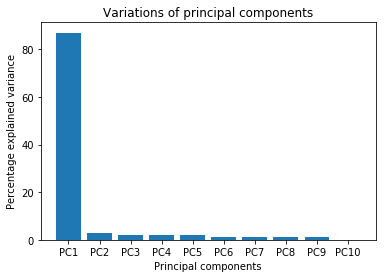

In [95]:
#visualization
plt.bar(x=range(1,len(percentage_variance)+1),height=percentage_variance,tick_label=pcs)
plt.title("Variations of principal components")
plt.ylabel("Percentage explained variance")
plt.xlabel("Principal components")
plt.show()

So from this scree plot we could deduce that the almost variation of the data is along PC1
==> A 2-D graph with PC1 and PC2 should do a good job in representing the data. We are not done yet. Now we want to make this PCs graph. So keep following.To draw a PCA graph we need to figure out the new coordinates.

In [97]:
#This dataframe shows how the old dimensions are transformed to the PCs dimensions
pca_dataframe=pd.DataFrame(pca_data,index=[*mouse,*monkey],columns=pcs)

In [98]:
pca_dataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
mouse1,9.089882,3.074732,1.965951,1.764863,-0.961901,-0.719314,0.557261,-0.760297,0.115735,-4.475547e-15
mouse2,9.771768,-0.898610,2.005097,-2.090167,1.310463,1.040429,0.176528,-0.250348,-1.112060,-1.010896e-15
mouse3,9.006476,-0.816175,-1.977629,0.727565,-1.070704,-1.088838,-1.498473,0.260578,-1.230325,-4.271091e-15
mouse4,9.012495,0.786935,-1.653314,0.968953,0.976239,1.536306,1.074039,1.377086,0.458891,-1.246516e-15
mouse5,9.623766,-2.026135,-0.433253,-1.219354,-0.227930,-0.760373,-0.353669,-0.619121,1.760719,1.798348e-15
monkey1,-9.463249,3.513261,-1.478990,-1.759614,1.400345,-0.704282,-0.548834,-0.271344,0.065606,4.198849e-17
monkey2,-8.982927,-0.717201,1.668023,-0.699118,-0.875997,-1.688286,0.606011,1.621795,0.042908,1.259898e-15
monkey3,-9.378762,0.230628,0.884950,0.175278,-1.617296,2.334710,-1.584415,0.100542,0.377374,4.945536e-15
monkey4,-9.555173,-1.947015,0.566530,2.337313,2.495617,-0.392444,-0.368564,-0.441077,0.019494,8.051866e-16
monkey5,-9.124276,-1.200421,-1.547364,-0.205720,-1.428837,0.442092,1.940115,-1.017814,-0.498343,3.849240e-15


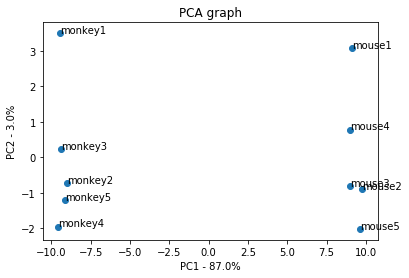

In [99]:
plt.scatter(pca_dataframe.PC1,pca_dataframe.PC2)
for sample in pca_dataframe.index:
    plt.annotate(sample,(pca_dataframe.PC1.loc[sample],pca_dataframe.PC2.loc[sample]))
plt.title("PCA graph")
plt.ylabel("PC2 - {0}%".format(percentage_variance[1]))
plt.xlabel("PC1 - {0}%".format(percentage_variance[0]))
plt.show()

How can we interpret this graph??

1. Monkeys samples clustered are correlated with each other.
2. Mouses samples clustered are correlated  with each other.
3. The separation between monkeys and mouses along the PC1 axis prouve that they are different from each others. But what causes this separation? which gene dimension has the largest influence on the PCs scores?


In [104]:
scores=pd.Series(pca.components_[0],index=genes)
sorted_scores=scores.abs().sort_values(ascending=False)
top_10_genes=sorted_scores[0:10].index

In [105]:
top_10_genes

Index(['gene75', 'gene13', 'gene28', 'gene60', 'gene10', 'gene42', 'gene90',
       'gene15', 'gene88', 'gene55'],
      dtype='object')